##### Q2.5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
import random

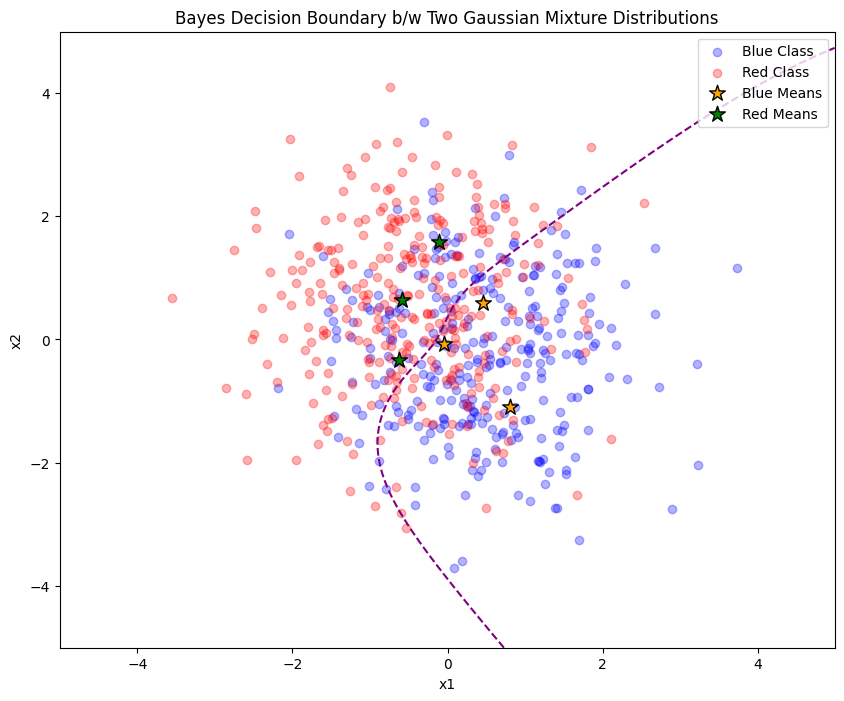

In [85]:
np.random.seed(32331) # change last num to 3
def generate_gmm_points(means, cov, n_samples=300):
    # Choosing one of the three means for each sample
    chosen_means = means[np.random.choice(len(means), size=n_samples)]
    
    # Generating points for each chosen mean
    points = np.array([np.random.multivariate_normal(mean, cov) for mean in chosen_means])
    return points

# declare bvn parameters
mean_vec = [0, 0]
cov_mat = np.eye(2)

# draw the means 
blue_means = np.random.multivariate_normal(mean_vec, cov_mat, 3)
red_means = np.random.multivariate_normal(mean_vec, cov_mat, 3)

# if you want correlated components... use this one
#cov_mat_2 = np.array([[1, 0.5], [0.5, 1]])
cov_mat_2 = np.eye(2)
# generate the points for each matrix 
blue_points = generate_gmm_points(blue_means, cov_mat_2)
red_points = generate_gmm_points(red_means, cov_mat_2)
# fit the mixture model
gmm_blue = GaussianMixture(n_components = 3, covariance_type = 'full').fit(blue_points)
gmm_red = GaussianMixture(n_components = 3, covariance_type = 'full').fit(red_points)

# create a grid for plotting decision boundary
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.dstack((x, y))

# evaluate the pdf for each point in the grid 
for mean, cov in zip(gmm_blue.means_, gmm_blue.covariances_):
    blue_density = np.sum([multivariate_normal(mean, cov).pdf(pos)], axis = 0)
for mean, cov in zip(gmm_red.means_, gmm_red.covariances_):
    red_density = np.sum([multivariate_normal(mean, cov).pdf(pos)], axis = 0) 

prob_blue = np.sum([gmm_blue.weights_[i] * multivariate_normal(gmm_blue.means_[i], 
                    gmm_blue.covariances_[i]).pdf(pos) for i in range(gmm_blue.n_components)], axis=0)

# Probability of each point on the grid belonging to the red class
prob_red = np.sum([gmm_red.weights_[i] * multivariate_normal(gmm_red.means_[i], 
                  gmm_red.covariances_[i]).pdf(pos) for i in range(gmm_red.n_components)], axis=0)

# The decision boundary will occur where the probabilities are equal
decision_boundary = prob_blue - prob_red

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Blue Class', alpha=0.3)
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Red Class', alpha=0.3)
plt.scatter(blue_means[:, 0], blue_means[:, 1], color='orange', marker='*', s=140, label='Blue Means', edgecolors='black')
plt.scatter(red_means[:, 0], red_means[:, 1], color='green', marker='*', s=140, label='Red Means', edgecolors='black')
plt.contour(x, y, decision_boundary, levels=[0], colors='purple', linestyles='--')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Bayes Decision Boundary b/w Two Gaussian Mixture Distributions')
plt.legend()
plt.show()